В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [83]:
my_list = [1, 2, 3]
print(sum(my_list))
print(sum([x**2 for x in my_list]))
print(sum([(x-1)**2 for x in my_list]))

6
14
5


**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [84]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [85]:
import numpy as np
print(sum(sum_purchases)/len(sum_purchases)) # 2.1.
print(np.mean(sum_purchases)) # 2.2.

667.95
667.95


**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [86]:
sorted_sum_purchases = sorted(sum_purchases)
# 3.1.
median = sorted_sum_purchases[len(sum_purchases)//2] if len(sum_purchases) % 2 else (sorted_sum_purchases[len(sum_purchases)//2-1] + sorted_sum_purchases[len(sum_purchases)//2]) / 2
print(median)
# 3.2.
print(np.median(sum_purchases))



319.0
319.0


**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [87]:
# 4.1.
purchase_mean = sum(sum_purchases)/len(sum_purchases)
purchase_minus_mean = [(i - purchase_mean)**2 for i in sum_purchases]
std_purchase_general = np.sqrt(sum(purchase_minus_mean)/len(sum_purchases))
std_purchase_sample = np.sqrt(sum(purchase_minus_mean)/(len(sum_purchases) - 1))
print(std_purchase_general, std_purchase_sample)

# 4.2.
print(np.std(sum_purchases), np.std(sum_purchases, ddof=1))

1096.0692713054227 1124.5433447451132
1096.0692713054227 1124.5433447451132


**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [88]:
import numpy as np
sample = [16]*10 + [17]*25 + [18]*20 + [20]*2
np.mean(sample)

np.float64(17.280701754385966)

**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [89]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

# 6.1.

visit_mean = sum(visits)/len(visits)
visit_minus_mean = [(i - visit_mean)**2 for i in visits]
std_visit_sample = np.sqrt(sum(visit_minus_mean)/(len(visits) - 1))

purchase_visit = [(sum_purchases[i] - purchase_mean)*(visits[i] - visit_mean) for i in range(len(visits))]
cov = sum(purchase_visit)/(len(visits)-1)

corrcoef = cov / (std_purchase_sample * std_visit_sample)

print(f"Pearson corrcoef: {corrcoef}")

# 6.2.

print(f"Pearson corrcoef in numpy: {np.corrcoef(sum_purchases, visits)[0,1]}")
print(f"# without outliers: {np.corrcoef(sum_purchases[:-2], visits[:-2])[0,1]}") 
print(f"sum_purchases: {sum_purchases}")
print(f"visits: {visits}")

desc = """
        The negative result (-0.30) describes a weak negative linear relationship.
        
        With or without outliers, both values are negative, meaning that as the number of visits increases, the total purchase amount tends to decrease slightly — contrary to intuition.

        This suggests that users who visit more often don’t necessarily spend more overall — possibly:

        - Making frequent small purchases,

        - Browsing more without buying much,

        - Or having a different buying behavior altogether.

"""
print(desc)


Pearson corrcoef: -0.3026584468766646
Pearson corrcoef in numpy: -0.3026584468766646
# without outliers: -0.3685212078127798
sum_purchases: [316, 493, 367, 153, 224, 121, 322, 450, 196, 397, 281, 239, 484, 124, 223, 448, 432, 255, 4310, 3524]
visits: [6, 2, 10, 3, 9, 9, 2, 3, 6, 6, 10, 2, 5, 10, 3, 5, 4, 7, 4, 2]

        The negative result (-0.30) describes a weak negative linear relationship.
        
        With or without outliers, both values are negative, meaning that as the number of visits increases, the total purchase amount tends to decrease slightly — contrary to intuition.

        This suggests that users who visit more often don’t necessarily spend more overall — possibly:

        - Making frequent small purchases,

        - Browsing more without buying much,

        - Or having a different buying behavior altogether.




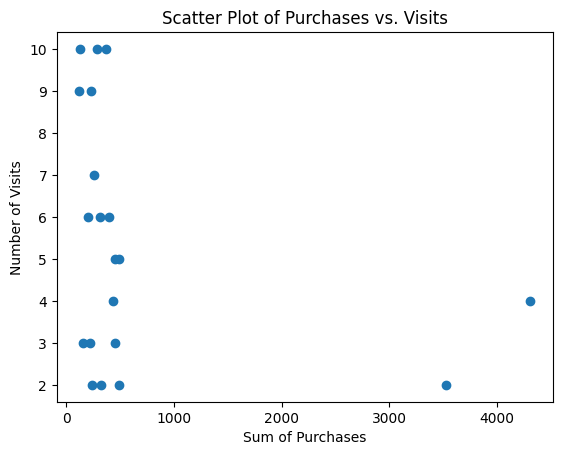

In [90]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

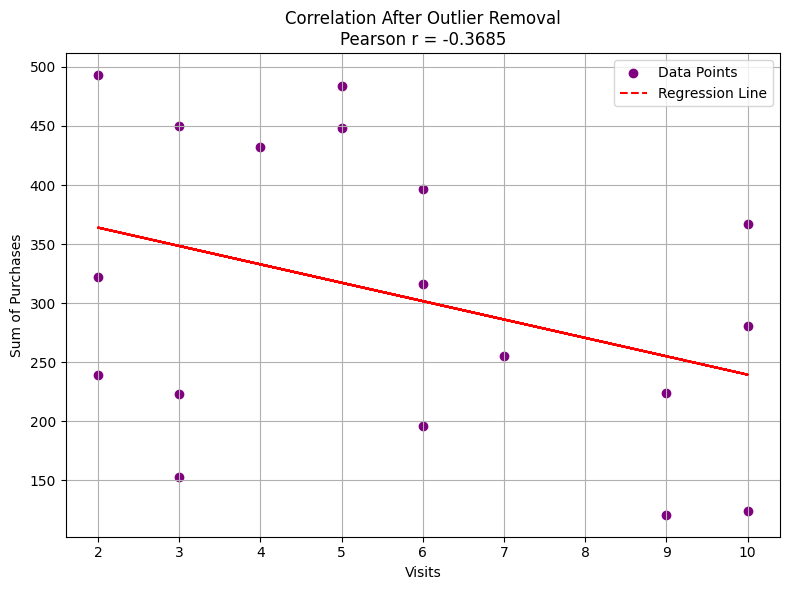

The correlation remains negative but offers a clearer view of the underlying trend.


In [91]:
threshold = np.mean(sum_purchases) + 2 * np.std(sum_purchases, ddof=1)
clean_sum_purchases = []
clean_visits = []

for i, _ in enumerate(sum_purchases):
    if sum_purchases[i] < threshold:
        clean_sum_purchases.append(sum_purchases[i])
        clean_visits.append(visits[i])

# Convert lists to arrays for numerical operations
clean_visits = np.array(clean_visits)
clean_sum_purchases = np.array(clean_sum_purchases)

correlation = np.corrcoef(clean_visits, clean_sum_purchases)[0, 1]

plt.figure(figsize=(8, 6))
plt.scatter(clean_visits, clean_sum_purchases, color='purple', label='Data Points')
plt.title(f'Correlation After Outlier Removal\nPearson r = {correlation:.4f}')
plt.xlabel('Visits')
plt.ylabel('Sum of Purchases')

# Regression line
m, b = np.polyfit(clean_visits, clean_sum_purchases, 1)
plt.plot(clean_visits, m * clean_visits + b, color='red', linestyle='--', label='Regression Line')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"The correlation remains negative but offers a clearer view of the underlying trend.")
